**instalattion et importation des bibliothèque necessaires**

In [ ]:
pip install pandas seaborn matplotlib sklearn

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**a - Chargement et nettoyage des données**

In [36]:
# charger le dataset
data = pd.read_csv('climate_change_dataset.csv')

# afficher le debut du tableau ainsi que les infos 
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [38]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'Year' ou 'Month'
data= data.dropna(subset=['Year', 'Month'])

In [39]:
# Convertir les colonnes non numériques en NaN
def convert_to_numeric(col):
    col = pd.to_numeric(col, errors='coerce')  # Convertir les valeurs non numériques en NaN
    return col

# Appliquer la conversion sur les colonnes numériques
numeric_cols = ['Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)', 'Precipitation (mm)', 'Humidity (%)',
                'Wind_Speed (m/s)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)', 'CO2_Concentration (ppm)',
                'Latitude', 'Longitude', 'Altitude (m)', 'Proximity_to_Water (km)', 'Urbanization_Index',
                'Vegetation_Index', 'ENSO_Index', 'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)']

for col in numeric_cols:
    data[col] = convert_to_numeric(data[col])

# Imputer les valeurs manquantes dans les colonnes numériques avec la moyenne
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Pour les colonnes non numériques
non_numeric_cols = ['Month', 'Vegetation_Index', 'ENSO_Index', 'Particulate_Matter (µg/m³)']

# Convertir les valeurs non numériques en NaN
def convert_to_str(col):
    col = col.astype(str)
    return col

for col in non_numeric_cols:
    data[col] = convert_to_str(data[col])
    # Remplacer les valeurs spécifiques par NaN sans utiliser inplace
    data[col] = data[col].replace('Unknown', pd.NA)

# Imputer les valeurs manquantes dans les colonnes non numériques avec la valeur la plus fréquente
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
data[non_numeric_cols] = imputer_non_numeric.fit_transform(data[non_numeric_cols])

# Créer une colonne de date à partir de Year et Month
data['Date'] = pd.to_datetime(data[['Year', 'Month']].astype(str).assign(DAY=1), errors='coerce')

data = data.dropna(subset=['Date'])

# Afficher les premières lignes du DataFrame pour vérification
#print(data.head())
#nombre de valeurs manquantes par colonne
missing_values = data.isnull().sum()
print(missing_values)

Year                          0
Month                         0
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               0
CO2_Concentration (ppm)       0
Latitude                      0
Longitude                     0
Altitude (m)                  0
Proximity_to_Water (km)       0
Urbanization_Index            0
Vegetation_Index              0
ENSO_Index                    0
Particulate_Matter (µg/m³)    0
Sea_Surface_Temp (°C)         0
Date                          0
dtype: int64


**b- Statistiques descriptives**

In [40]:
# Obtenir les statistiques descriptives
statistiques_descriptives = data.describe()

# Afficher les statistiques descriptives
print(statistiques_descriptives)

       Avg_Temp (°C)  Max_Temp (°C)  Min_Temp (°C)  Precipitation (mm)  \
count      41.000000      41.000000      41.000000           41.000000   
mean       12.903483      23.092700    2936.763733         2792.156586   
min        -4.965473       1.543655      -8.546003            2.957244   
25%         5.241145      16.815980       3.173975           56.040254   
50%        12.791250      22.921988      14.845233          128.917833   
75%        19.895067      30.591221      27.319495          185.051493   
max        34.282303      38.712519   99999.000000        99999.000000   
std        10.178004       9.701644   15575.416420        15579.749299   

       Humidity (%)  Wind_Speed (m/s)  Solar_Irradiance (W/m²)  \
count     41.000000         41.000000                41.000000   
mean      67.743415       2630.290025               184.139874   
min       30.871082          0.308558                65.367529   
25%       52.915829          6.659816               129.632548   
50%

des valeurs vraiment ...... !!!! **On peux voir que le dataset contient des valeurs Aberrantes pour certaines colonnes ! (vu que c'est un dataset pas vérifié pas étonnant) 
mais ceci n'impactera pas la suite de notre étude on va juste supprimer les colonnes avec les valeurs aberrantes !**

In [53]:
# Définir un seuil pour détecter les valeurs aberrantes
threshold = 1000

# Filtrer uniquement les colonnes numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Supprimer les colonnes où la valeur maximale dépasse le seuil
columns_to_drop = [col for col in numeric_columns if data[col].max() > threshold]

# Afficher les colonnes qui seront supprimées
print(f"Colonnes supprimées : {columns_to_drop}")

# Supprimer les colonnes du DataFrame
data = data.drop(columns=columns_to_drop)
# Afficher un aperçu du DataFrame nettoyé
print(data_cleaned.describe())

Colonnes supprimées : []
       Avg_Temp (°C)  Max_Temp (°C)  Humidity (%)  Solar_Irradiance (W/m²)  \
count      41.000000      41.000000     41.000000                41.000000   
mean       12.903483      23.092700     67.743415               184.139874   
min        -4.965473       1.543655     30.871082                65.367529   
25%         5.241145      16.815980     52.915829               129.632548   
50%        12.791250      22.921988     67.769989               183.156302   
75%        19.895067      30.591221     83.644886               235.229355   
max        34.282303      38.712519     98.056363               298.449195   
std        10.178004       9.701644     19.040325                66.297320   

       Cloud_Cover (%)  CO2_Concentration (ppm)     Longitude  Altitude (m)  \
count        41.000000                41.000000  4.100000e+01          41.0   
mean         53.277600               423.813469 -7.400600e+01          10.0   
min           0.455543             

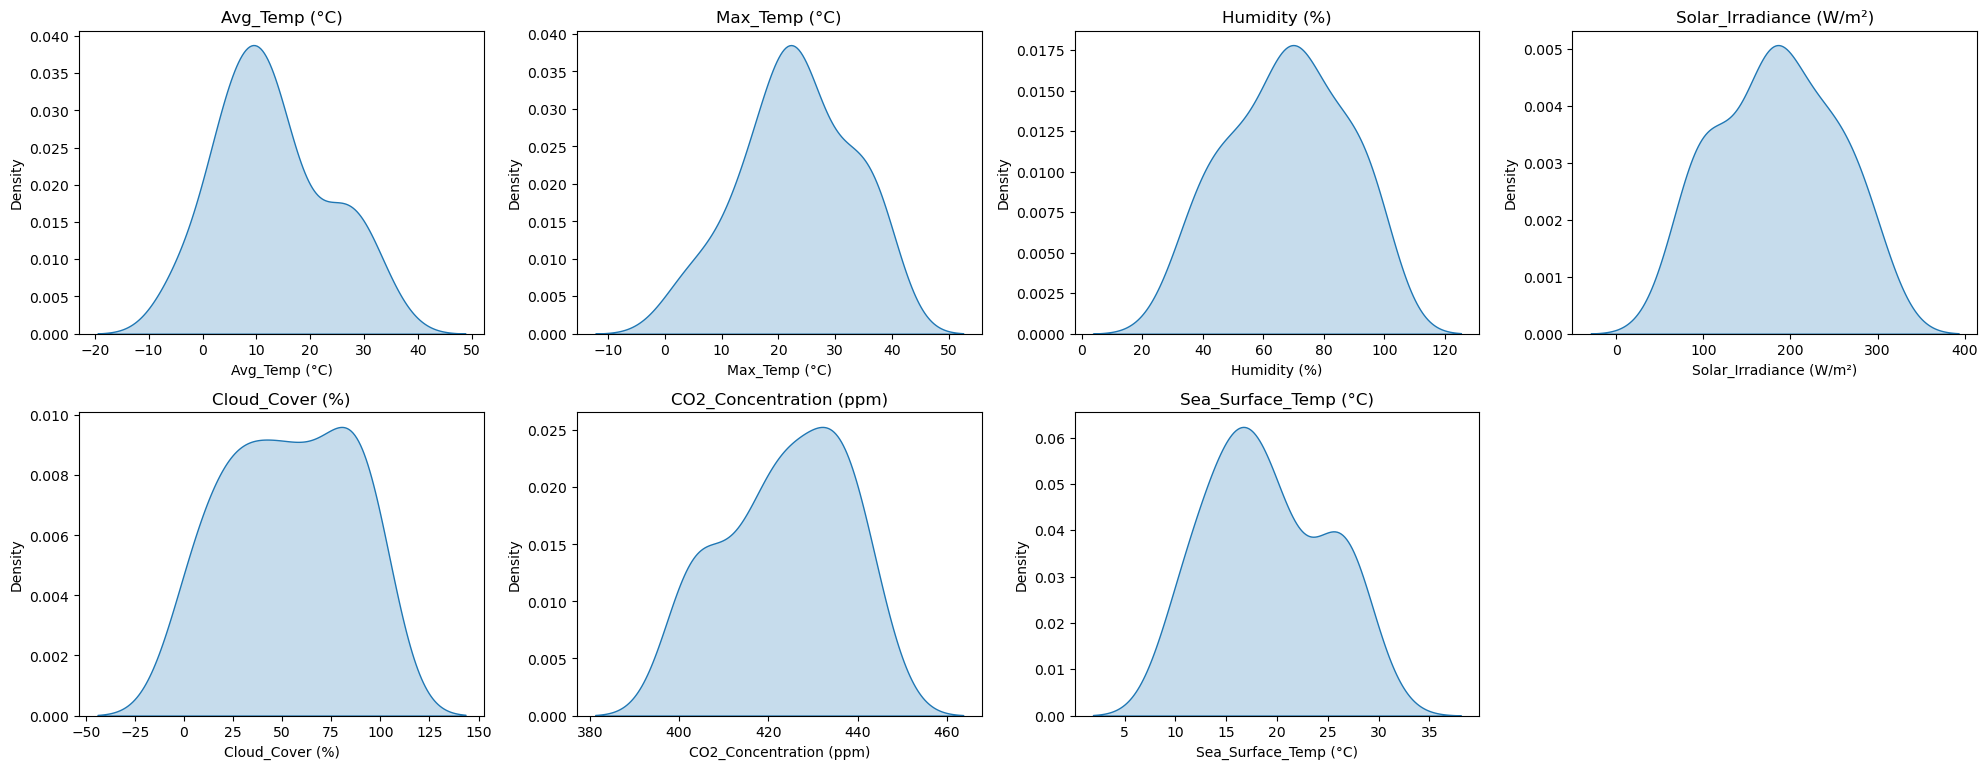

In [54]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Filtrer les colonnes avec une variance non nulle
non_zero_variance_columns = [col for col in numeric_columns if data_cleaned[col].var() > 0]

# Supprimer 'Longitude' des colonnes à tracer si elle est dans la liste
columns_to_plot = [col for col in non_zero_variance_columns if col != 'Longitude']

# Convertir les valeurs non numériques en NaN pour éviter les erreurs
for col in columns_to_plot:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Tracer les courbes de densité pour les colonnes restantes
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Créer un subplot pour chaque colonne
    sns.kdeplot(data_cleaned[col].dropna(), fill=True)  # Ignorer les valeurs manquantes
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

**c- regression et clustering**

vise à explorer les relations entre les caractéristiques climatiques et la température moyenne, ainsi qu'à identifier des groupes de données climatiques similaires.

**Régression Linéaire**
Un modèle de régression linéaire a été utilisé pour prédire la température moyenne (`Avg_Temp (°C)`) en fonction de plusieurs caractéristiques climatiques. Les coefficients du modèle nous permettent de comprendre l'impact relatif de chaque caractéristique sur la température. Cette analyse aide à identifier quelles variables ont le plus grand effet sur la température moyenne.

**Clustering (K-means)**
Le clustering K-means a été appliqué pour segmenter les données en 3 groupes basés sur les caractéristiques climatiques. Cette segmentation permet de découvrir des sous-groupes au sein des données, révélant potentiellement des patterns ou des tendances cachés. Les étiquettes de clusters fournissent une vue d'ensemble des regroupements naturels dans les données climatiques.

cette Analyse est Utile pour : 

- **Régression Linéaire** : Identifie les facteurs les plus influents sur la température, ce qui peut guider les politiques climatiques ou les stratégies de gestion environnementale.
- **Clustering** : Aide à découvrir des groupes de données similaires, ce qui peut être utile pour des analyses plus approfondies ou pour cibler des interventions spécifiques.


**Rappel :** 

- **Caractéristiques (features) :** Ce sont les variables pour prédire.
- **Cible (target) :** C'est la variable dépendante qu'on veux prédire, ici la température moyenne (Avg_Temp (°C)).

In [91]:
# Sélection des caractéristiques pour la régression (en excluant Year et Month)

features = data_cleaned[['CO2_Concentration (ppm)', 'Humidity (%)', 'Solar_Irradiance (W/m²)', 'Sea_Surface_Temp (°C)','Cloud_Cover (%)','Max_Temp (°C)']]
target = data_cleaned['Avg_Temp (°C)']

# Séparer le dataset en ensembles d'entraînement et de test (les bases des algorithmes de deep learning)
#20 % des données seront utilisées pour les tests, et le reste pour l'entraînement.

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardiser les caractéristiques pour améliorer les performances en régression et en clustering
# pour avoir une moyenne de 0 et un écart-type de 1. Cela aide les modèles à converger
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle de régression linéaire
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

# Clustering (K-means) avec 3 clusters basé sur les caractéristiques climatiques
kmeans_model = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_model.fit_predict(X_train_scaled)

# Afficher les coefficients du modèle de régression et les étiquettes des clusters
regression_coefficients = regression_model.coef_
cluster_labels = kmeans_model.labels_

regression_coefficients, cluster_labels[:30]

C:\Users\pc cam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([-0.81520853,  1.46806223, -1.46210785, -3.8106795 , -3.39349888,
        -3.59515078]),
 array([1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0,
        0, 1, 2, 1, 1, 2, 0, 2]))

**Visualisation**

**Coefficients de régression**

- **Coefficients Positifs** : Les caractéristiques avec des coefficients positifs augmentent la température moyenne lorsque leur valeur augmente.

- **Coefficients Négatifs** : Les caractéristiques avec des coefficients négatifs diminuent la température moyenne lorsque leur valeur augmente.

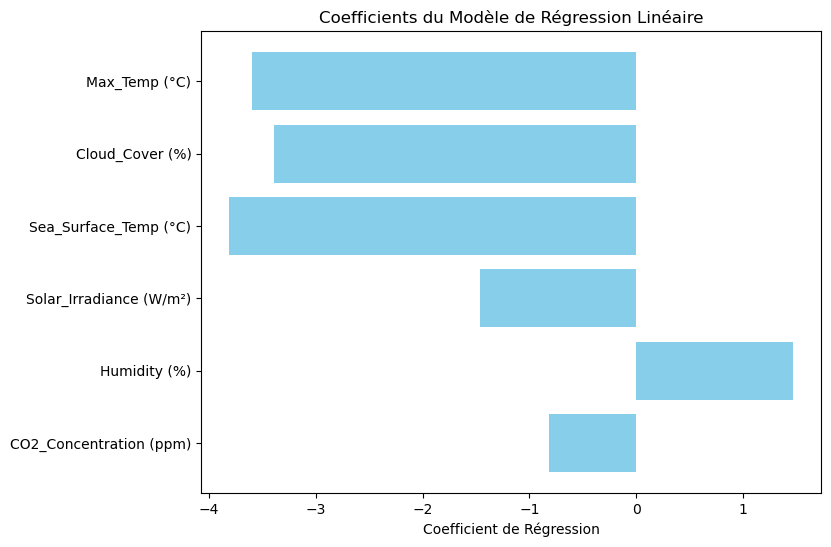

In [89]:
# Création du graphique des coefficients de régression
plt.figure(figsize=(8, 6))
plt.barh(features.columns, regression_coefficients, color='skyblue')
plt.xlabel('Coefficient de Régression')
plt.title('Coefficients du Modèle de Régression Linéaire')
plt.show()

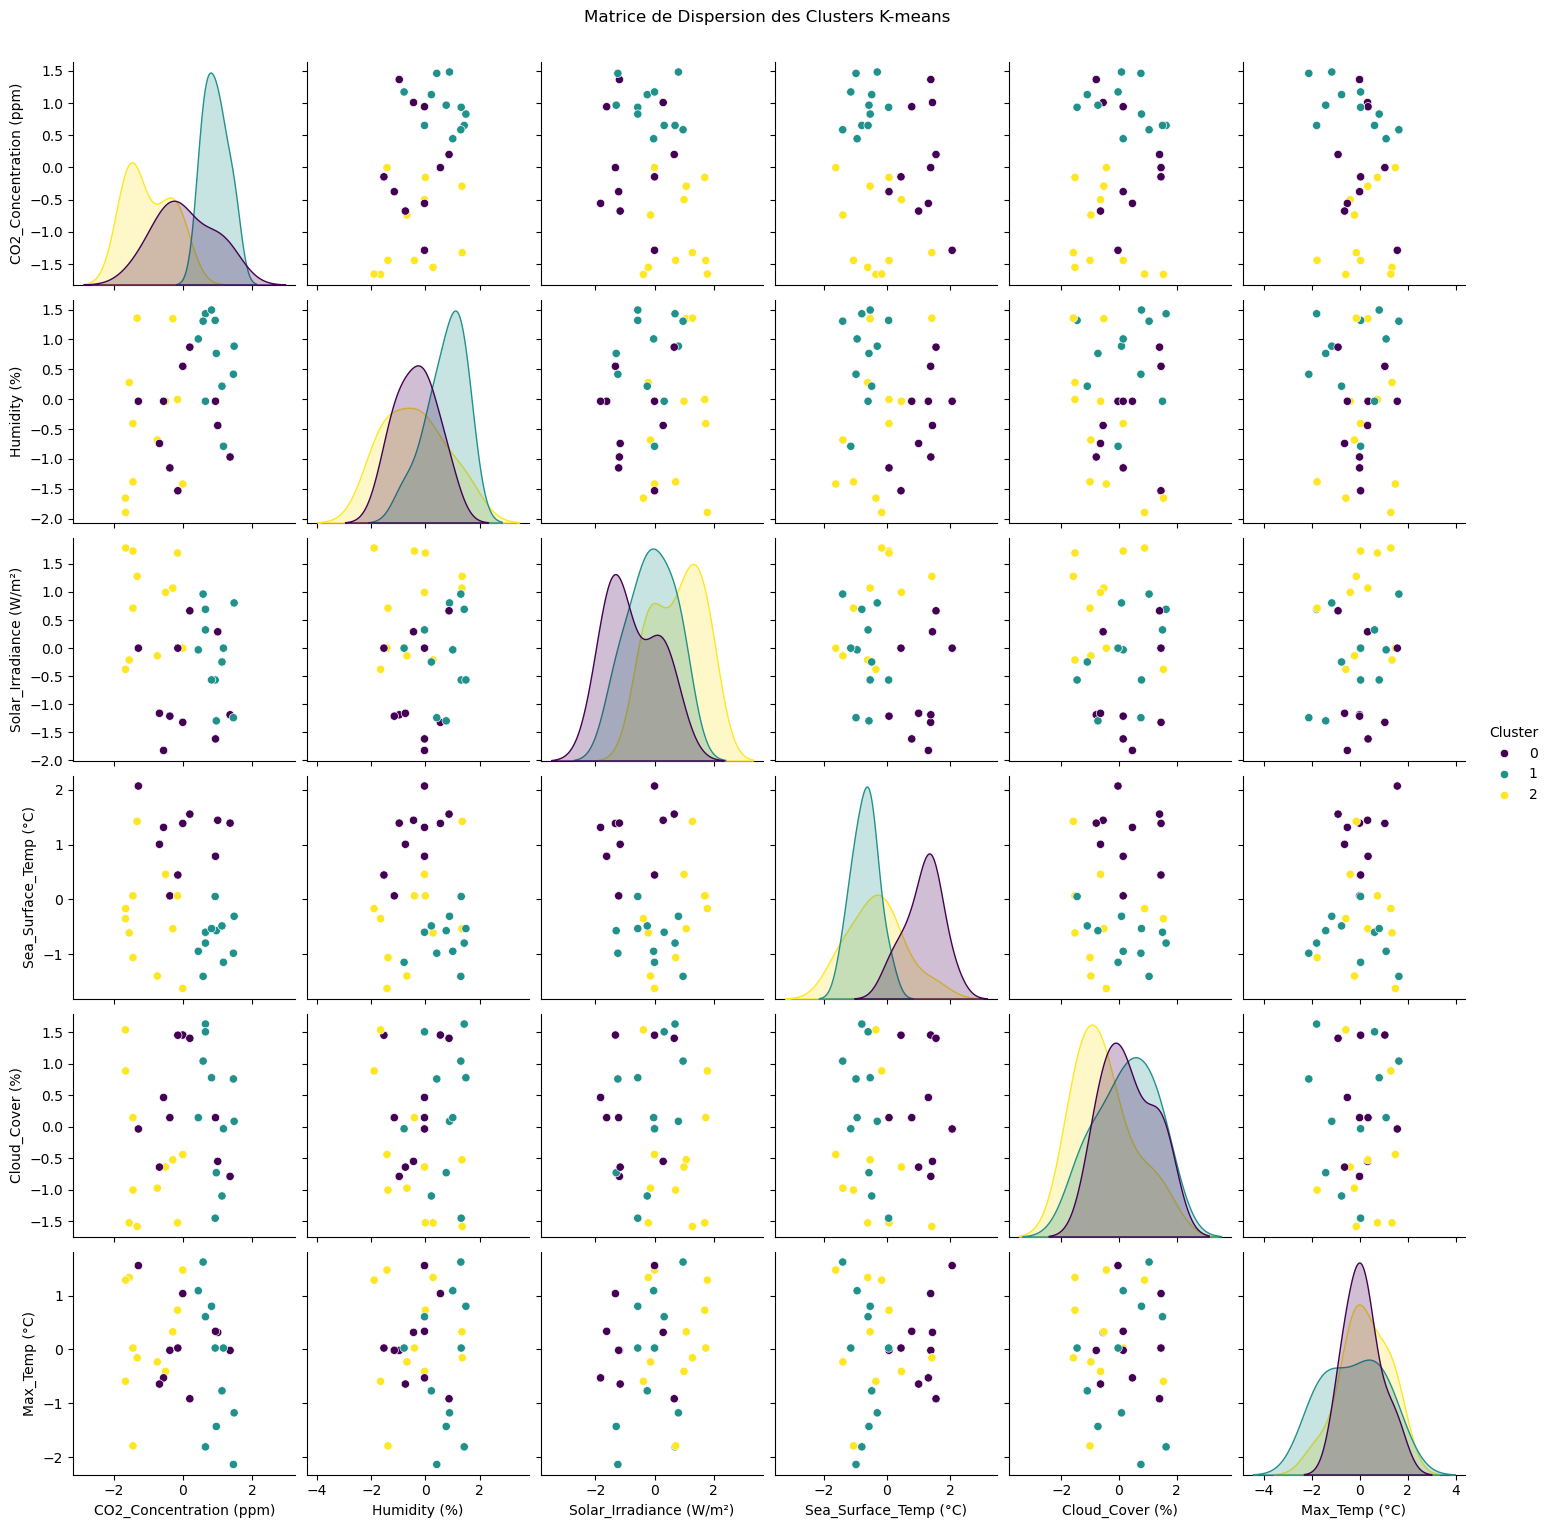

In [92]:
# Créer un DataFrame avec les caractéristiques et les labels des clusters
df_features = pd.DataFrame(X_train_scaled, columns=features.columns)
df_features['Cluster'] = clusters

# Créer une matrice de dispersion
sns.pairplot(df_features, hue='Cluster', palette='viridis')
plt.suptitle('Matrice de Dispersion des Clusters K-means', y=1.02)
plt.show()